<a href="https://colab.research.google.com/github/DimaKav/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/module3-Intro-to-Keras/LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

# Scope out the data

In [1]:
import keras
from keras.datasets import boston_housing

Using TensorFlow backend.


In [0]:
(X_train, y_train),(X_test,y_test)=boston_housing.load_data()

In [3]:
X_train[1], y_train[1]

(array([2.1770e-02, 8.2500e+01, 2.0300e+00, 0.0000e+00, 4.1500e-01,
        7.6100e+00, 1.5700e+01, 6.2700e+00, 2.0000e+00, 3.4800e+02,
        1.4700e+01, 3.9538e+02, 3.1100e+00]), 42.3)

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [5]:
X_train.dtype

dtype('float64')

In [0]:
column_names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX',
              'PTRATIO','B','LSTAT']
              
key= ['Per capita crime rate.',
    'The proportion of residential land zoned for lots over 25,000\
     square feet.',
    'The proportion of non-retail business acres per town.',
    'Charles River dummy variable (=1 if tract bounds river; 0\
     otherwise).',
    'Nitric oxides concentration (parts per 10 million).',
    'The average number of rooms per dwelling.',
    'The porportion of owner-occupied units built before 1940.',
    'Weighted distances to five Boston employment centers.',
    'Index of accessibility to radial highways.',
    'Full-value property tax rate per $10,000.',
    'Pupil-Teacher ratio by town.',
    '1000*(Bk-0.63)**2 where Bk is the proportion of Black people by\
     town.',
    'Percentage lower status of the population.']

In [7]:
import pandas as pd
df= pd.DataFrame(X_train, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


# Build the model

In [8]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
x_train = (X_train - mean)/std
x_test = (X_test - mean)/std
print(x_train[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


#### Linear regression first...

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mean_squared_error(y_test, y_pred)

23.195599256422906

Should not be hard to beast this score...

In [9]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
model= Sequential()
model.add(Dense(26, activation='relu',input_shape=(13,)))
model.add(Dense(26, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [31]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse', metrics=['mae'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 26)                364       
_________________________________________________________________
dense_2 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                324       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 13        
Total params: 1,403
Trainable params: 1,403
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(X_train, y_train, epochs=1000, validation_split=.1)
scores = model.evaluate(X_test, y_test)

Train on 363 samples, validate on 41 samples
Epoch 1/1000
363/363 [==============================] - 0s 64us/step - loss: 15.3343 - mean_absolute_error: 2.8282 - val_loss: 21.0408 - val_mean_absolute_error: 3.4755
Epoch 2/1000
363/363 [==============================] - 0s 51us/step - loss: 25.7477 - mean_absolute_error: 3.4219 - val_loss: 19.4203 - val_mean_absolute_error: 3.4331
Epoch 3/1000
363/363 [==============================] - 0s 53us/step - loss: 14.7253 - mean_absolute_error: 2.7510 - val_loss: 19.4639 - val_mean_absolute_error: 3.4256
Epoch 4/1000
363/363 [==============================] - 0s 53us/step - loss: 23.1647 - mean_absolute_error: 3.4440 - val_loss: 20.0413 - val_mean_absolute_error: 3.5325
Epoch 5/1000
363/363 [==============================] - 0s 56us/step - loss: 14.5472 - mean_absolute_error: 2.7527 - val_loss: 25.2948 - val_mean_absolute_error: 3.6862
Epoch 6/1000
363/363 [==============================] - 0s 58us/step - loss: 16.9044 - mean_absolute_error: 2.

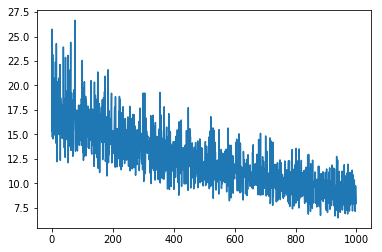

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.epoch, np.array(history.history['loss']))

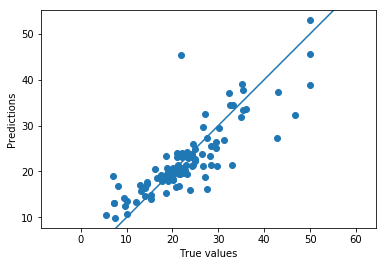

In [39]:
# Predict some housing prices using data from the test set

test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100,100],[-100,100])

The model seems to capture the general trend in the data. Let's plot a histogram that shows the distribution of our prediction errors.

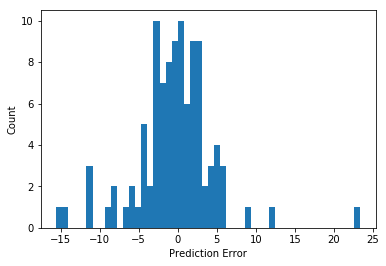

In [40]:
error = test_predictions - y_test
plt.hist(error, bins=50)
plt.xlabel("Prediction Error")
_ = plt.ylabel('Count')

It seems the model is overfitting the most around -5 and +5

# Cross validate the model
There isn't very much data so repeated sub-sampling via cross validation over all observations (train+test) needs to happen. Here, we train the model on four random split and test it on the fifth.

In [27]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.datasets import boston_housing

(X_train,y_train),(X_test,y_test) = boston_housing.load_data()

X_train.shape, X_test.shape

((404, 13), (102, 13))

In [28]:
import numpy as np

X_train = np.concatenate((X_train,X_test), axis=0)
y_train = np.concatenate((y_train,y_test), axis=0)

X_train.shape, y_train.shape

((506, 13), (506,))

In [0]:
def baseline_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', 
              activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [30]:
# Initialize random number generator with a constant random seed
# to ensure consistency in initializing model weights and the model

np.random.seed(42)

# Add scaler and Keras regressor with the model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model,   
                    epochs=100, batch_size=5, verbose=0)))
    
# Add estimator list to a Sklearn pipeline

pipeline = Pipeline(estimators)
 
# Initialize instance of k-fold validation from sklearn api

kfold = KFold(n_splits=5, random_state=42)

# Pass pipeline instance, training data and labels, and k-fold crossvalidator instance to evaluate score

results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Average MSE of all 5 runs: %.2f, with standard dev: (%.2f)" %   
      (-1*(results.mean()), results.std()))

Instructions for updating:
Use tf.cast instead.
Average MSE of all 5 runs: 14.96, with standard dev: (2.56)


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout 
import numpy as np

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.